In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random
import statistics
import kmax as kx
import utility as util
from hierarchy import *

# Erdos-Renyi Simulations

In [2]:
def my_draw(tree, draw_path=True):
    #layout = hierarchyc_pos(tree, 0)
    layout = nx.spring_layout(tree)
    # nx.draw_networkx_nodes(tree, pos=layout, node_size=4)
    nx.draw_networkx_labels(tree, pos=layout, font_size=8, font_color="tab:blue")
    
    #if draw_path:
    #    path_cover,_=util.path_cover(tree)
    #    nx.draw_networkx_edges(rooted_tree, pos=layout, edgelist=path_cover, edge_color="tab:red", arrows=True)
    #    
    #    other_edges = [(u,v) for u,v in rooted_tree.edges() if (u,v) not in path_cover and (v,u) not in path_cover]
    #    nx.draw_networkx_edges(rooted_tree, pos=layout, edgelist=other_edges)
    #else:
    nx.draw_networkx_edges(tree, pos=layout)

# Generate Tree

In [3]:
# Constants
n = 20
lam = 0.7

tree = nx.erdos_renyi_graph(n, lam/n)
for u,v in tree.edges():
    tree[u][v]['weight'] = 1

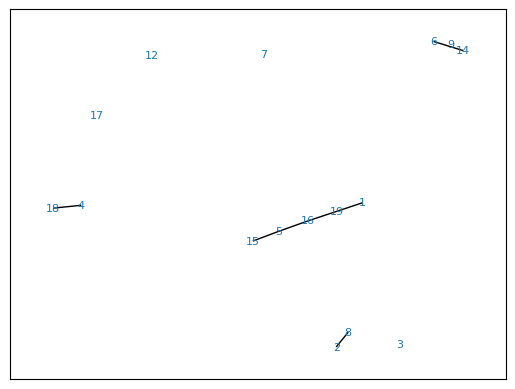

In [4]:
my_draw(tree)

# Simulation

For poisson branching process:
$$
\lambda = 0.7 \implies p\approx 0.874161
$$

In [132]:
lam = 0.5
p = 0.9214
EX_EN = 2-(2+lam*p)*math.exp(-lam*p)
EX = EX_EN / (1-lam)

In [133]:
EX_EN

0.44768733277352535

In [134]:
EX

0.8953746655470507

In [126]:
def expectation_X_sample(sample_tree): 
    X = 0
    for nodes in nx.connected_components(sample_tree):
        subgraph = sample_tree.subgraph(nodes)
        path, _, Xi = util.path_cover(subgraph, list(nodes)[0])
        # X += Xi
        X += Xi * nx.number_of_nodes(subgraph)
        
    return X

In [127]:
def expectation_X(lam, num_samples=100):
    Xs = 0
    Ns = 0
    for _ in range(num_samples):
        # Erdos-Reyni
        n = 100000
        sample_tree = nx.fast_gnp_random_graph(n, lam/n)
        #sample_tree = nx.erdos_renyi_graph(2000, lam/2000)

        # Poisson Branching
        #sample_tree = nx.Graph(GWBP(lam, MAXLEVEL=100))
        for u,v in sample_tree.edges():
            sample_tree[u][v]['weight'] = 1

        # Calculate EX/EN for current sample
        Xs += expectation_X_sample(sample_tree)
        Ns += nx.number_of_nodes(sample_tree)
    return Xs / Ns

In [128]:
samples_per_iteration = 1
num_iterations = 1
values = [expectation_X(lam, num_samples=samples_per_iteration) for _ in range(num_iterations)]

In [135]:
mean = statistics.mean(values)
mean

0.87221

In [136]:
abs(mean-EX)

0.023164665547050656

In [137]:
1 - mean/EX

0.025871477537168897

### Graphing

In [15]:
plt.plot(ns, values)
plt.xlabel("n")
plt.ylabel("EX")
plt.axhline(y=statistics.mean(values), color='red')

NameError: name 'ns' is not defined